<a href="https://colab.research.google.com/github/imaravind007/COTA/blob/main/COTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting the gdrive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Required Libraries 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Company/COTA/cancer-datasets_filtered_pancan_clinical.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,11,20,22,44,48,53,54,77,81,84,85,87,89,90,91,92,93,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,137,138,139,140,141,142,143,144,145,146,148,150,151,153,155,156,157,158,159,162,164,166,167,168,169,170,171,176,177,178,181,182,184,188,189,191,193,194,195,196,197,198,199,200,201,202,203,204,205,207,211,212,214,215,216,217,218,220,221,222,224,225,226,227,228,229,230,231,232,233,234,236,237,238,239,241,242,250,251,252,253,254,255,256,258,259,260,261,262,263,264,265,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,310,311,314,315,316,317,318,319,320,321,322,323,324,325,327,328,333,334,335,336,339,341,342,343,344,345,346,347,350,351,352,353,354,355,358,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,376,377,378,379,381,382,383,384,38

## Exploratory Data Analysis 

In [4]:
data.describe()

,days_to_birth,days_to_initial_pathologic_diagnosis,age_at_initial_pathologic_diagnosis,year_of_initial_pathologic_diagnosis,stage_other,number_of_lymphnodes_positive_by_he,height,weight,history_of_radiation_metastatic_site,days_to_patient_progression_free,days_to_first_response,days_to_first_partial_response,days_to_first_complete_response,days_to_tumor_progression,er_estimated_duration_response,er_disease_extent_prior_er_treatment,er_solid_tumor_response_documented_type,er_solid_tumor_response_documented_type_other,er_response_type,history_of_radiation_primary_site,history_prior_surgery_type,patient_progression_status,history_prior_surgery_type_other,history_prior_surgery_indicator,field,molecular_abnormality_results_other,molecular_abnormality_results,number_of_lymphnodes_positive_by_ihc,number_pack_years_smoked,stopped_smoking_year,year_of_tobacco_smoking_onset,age_began_smoking_in_years,days_to_sample_procurement,hbv_test,on_haart_therapy_at_cancer_diagnosis,hcv_test,prior_aids_conditions,on_haart_therapy_prior_to_cancer_diagnosis,kshv_hhv8_test,days_to_hiv_diagnosis,...,ldh_upper_limit,number_of_involved_extranodal_sites,genetic_abnormality_tested_other,genetic_abnormality_tested_1,genetic_abnormality_results_other,genetic_abnormality_results,pet_scan_results,epstein_barr_viral_status,lymph_node_involvement_site,mib1_positive_percentage_range_1,genetic_abnormality_method_other,extranodal_involvment_site_other,ldh_lab_value,ldh_level,ldh_norm_range_upper,genetic_abnormality_method,bone_marrow_sample_histology,albumin_result_upper_limit,albumin_result_lower_limit,albumin_result_specified_value,platelet_result_upper_limit,intern_norm_ratio_upper_limit,platelet_result_lower_limit,cancer_first_degree_relative,creatinine_lower_level,prothrombin_time_result_value,ca_19_9_level_upper,ca_19_9_level_lower,ca_19_9_level,creatinine_upper_limit,creatinine_value_in_mg_dl,bilirubin_lower_limit,total_bilirubin_upper_limit,platelet_result_count,fetoprotein_outcome_value,fetoprotein_outcome_upper_limit,fetoprotein_outcome_lower_limit,inter_norm_ratio_lower_limit,bilirubin_upper_limit,days_to_last_known_alive
count,10644.000000,10638.0,10712.000000,10633.000000,0.0,3902.000000,2695.000000,2767.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,833.000000,1640.000000,1159.000000,992.000000,337.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.000000,37.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000,0.0,0.0,0.0,0.0,31.000000,31.000000,31.000000,34.000000,27.000000,34.000000,20.000000,34.000000,32.000000,31.000000,28.0,30.000000,34.000000,34.000000,32.000000,32.000000,34.000000,24.000000,25.00000,25.0,27.000000,32.000000,11.000000
mean,-21771.966272,0.0,59.121826,2008.072886,NaN,2.522553,167.001885,79.885966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254502,41.794794,1995.079379,1965.127016,27.534125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,426.818182,1.243243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480.266667,NaN,NaN,NaN,NaN,4.932258,3.458065,4.083871,103569.117647,2.903704,33496.470588,1.750000,0.641176,2.300000,48.351613,0.0,343.638333,1.188235,0.858824,0.100000,1.071875,60388.794118,3.753333,7.48400,0.0,2.137037,0.637500,1828.545455
std,5249.227092,0.0,14.367192,4.355321,NaN,5.289989,10.942364,22.309120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.269107,34.088284,14.577845,13.166940,106.245614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,126.637636,1.362298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224.932930,NaN,NaN,NaN,NaN,0.101282,0.071992,0.511271,188872.400014,4.198853,61194.453793,0.910465,0.137329,3.442992,9.171291,0.0,1248.404662,0.134310,0.195584,0.087988,0.188773,113002.179824,2.644553,2.23936,0.0,3.232664,0.326022,1329.512419
min,-32918.000000,0.0,10.000000,1978.000000,NaN,0.000000,61.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1946.000000,1930.000000,9.000000,NaN,NaN,NaN,

In [5]:
data.columns.to_list()

['bcr_patient_uuid',
 'bcr_patient_barcode',
 'acronym',
 'gender',
 'vital_status',
 'days_to_birth',
 'days_to_death',
 'days_to_last_followup',
 'days_to_initial_pathologic_diagnosis',
 'age_at_initial_pathologic_diagnosis',
 'icd_10',
 'tissue_retrospective_collection_indicator',
 'icd_o_3_histology',
 'tissue_prospective_collection_indicator',
 'history_of_neoadjuvant_treatment',
 'icd_o_3_site',
 'tumor_tissue_site',
 'new_tumor_event_after_initial_treatment',
 'radiation_therapy',
 'race',
 'project_code',
 'prior_dx',
 'disease_code',
 'ethnicity',
 'informed_consent_verified',
 'person_neoplasm_cancer_status',
 'patient_id',
 'year_of_initial_pathologic_diagnosis',
 'histological_type',
 'tissue_source_site',
 'form_completion_date',
 'pathologic_T',
 'pathologic_M',
 'clinical_M',
 'pathologic_N',
 'system_version',
 'pathologic_stage',
 'stage_other',
 'clinical_stage',
 'clinical_T',
 'clinical_N',
 'extranodal_involvement',
 'postoperative_rx_tx',
 'primary_therapy_outcome

In [6]:
data.isna().sum()

bcr_patient_uuid                       0
bcr_patient_barcode                    0
acronym                                0
gender                                 0
vital_status                           4
                                   ...  
fetoprotein_outcome_lower_limit    10736
inter_norm_ratio_lower_limit       10734
family_cancer_type_txt             10740
bilirubin_upper_limit              10729
days_to_last_known_alive           10750
Length: 746, dtype: int64

In [11]:
plt.figure(figsize=(400,150))
ax = sns.barplot(x=data.columns, y=list(data.isna().sum()))

In [12]:
data['year_of_initial_pathologic_diagnosis'].isna().value_counts()

False    10633
True       128
Name: year_of_initial_pathologic_diagnosis, dtype: int64

In [13]:
data['vital_status'].isna().value_counts()

False    10757
True         4
Name: vital_status, dtype: int64

In [14]:
data.columns

Index(['bcr_patient_uuid', 'bcr_patient_barcode', 'acronym', 'gender',
       'vital_status', 'days_to_birth', 'days_to_death',
       'days_to_last_followup', 'days_to_initial_pathologic_diagnosis',
       'age_at_initial_pathologic_diagnosis',
       ...
       'total_bilirubin_upper_limit', 'platelet_result_count',
       'fibrosis_ishak_score', 'fetoprotein_outcome_value',
       'fetoprotein_outcome_upper_limit', 'fetoprotein_outcome_lower_limit',
       'inter_norm_ratio_lower_limit', 'family_cancer_type_txt',
       'bilirubin_upper_limit', 'days_to_last_known_alive'],
      dtype='object', length=746)

# 1.How many Columns are there in the dataset?

## Answer: I have used the shape function from python pandas dataframe to find the number of rows and columns in the dataset. 

In [15]:
columns = data.shape

In [16]:
print("The number of rows in the dataset are :" ,columns[0])
print("The number of columns in the dataset are :" ,columns[1])

The number of rows in the dataset are : 10761
The number of columns in the dataset are : 746


# 2. Breakdown columns by datatypes with counts
### Answer: I have used the dtypes function from python pandas dataframe to find the dtypes of the column.

In [17]:
data.dtypes.value_counts()

object     500
float64    246
dtype: int64

# 3. Breakdown counts by gender, race and ethnicity
#### Answer: value_counts from the python dataframe is used to identify the number of counts in the each categorical features. 

In [18]:
data['gender'].value_counts()

FEMALE    5623
MALE      5138
Name: gender, dtype: int64

In [19]:
data['gender'].unique()

array(['FEMALE', 'MALE'], dtype=object)

In [20]:
data['vital_status'].unique()

array(['Alive', 'Dead', nan, '[Discrepancy]'], dtype=object)

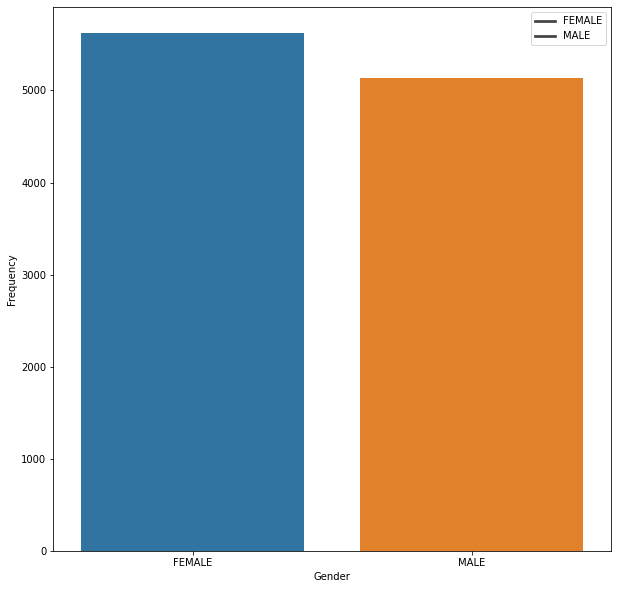

In [21]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x=data['gender'].unique(), y=list(data['gender'].value_counts()))
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.legend(data['gender'].unique())

In [23]:
data['race'].value_counts()

WHITE                                        7862
BLACK OR AFRICAN AMERICAN                     902
ASIAN                                         670
[Not Evaluated]                               153
[Unknown]                                     131
AMERICAN INDIAN OR ALASKA NATIVE               27
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER      13
Name: race, dtype: int64

In [24]:
data['race'].dropna().unique()

array(['WHITE', 'BLACK OR AFRICAN AMERICAN', 'ASIAN',
       'AMERICAN INDIAN OR ALASKA NATIVE',
       'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', '[Unknown]',
       '[Not Evaluated]'], dtype=object)

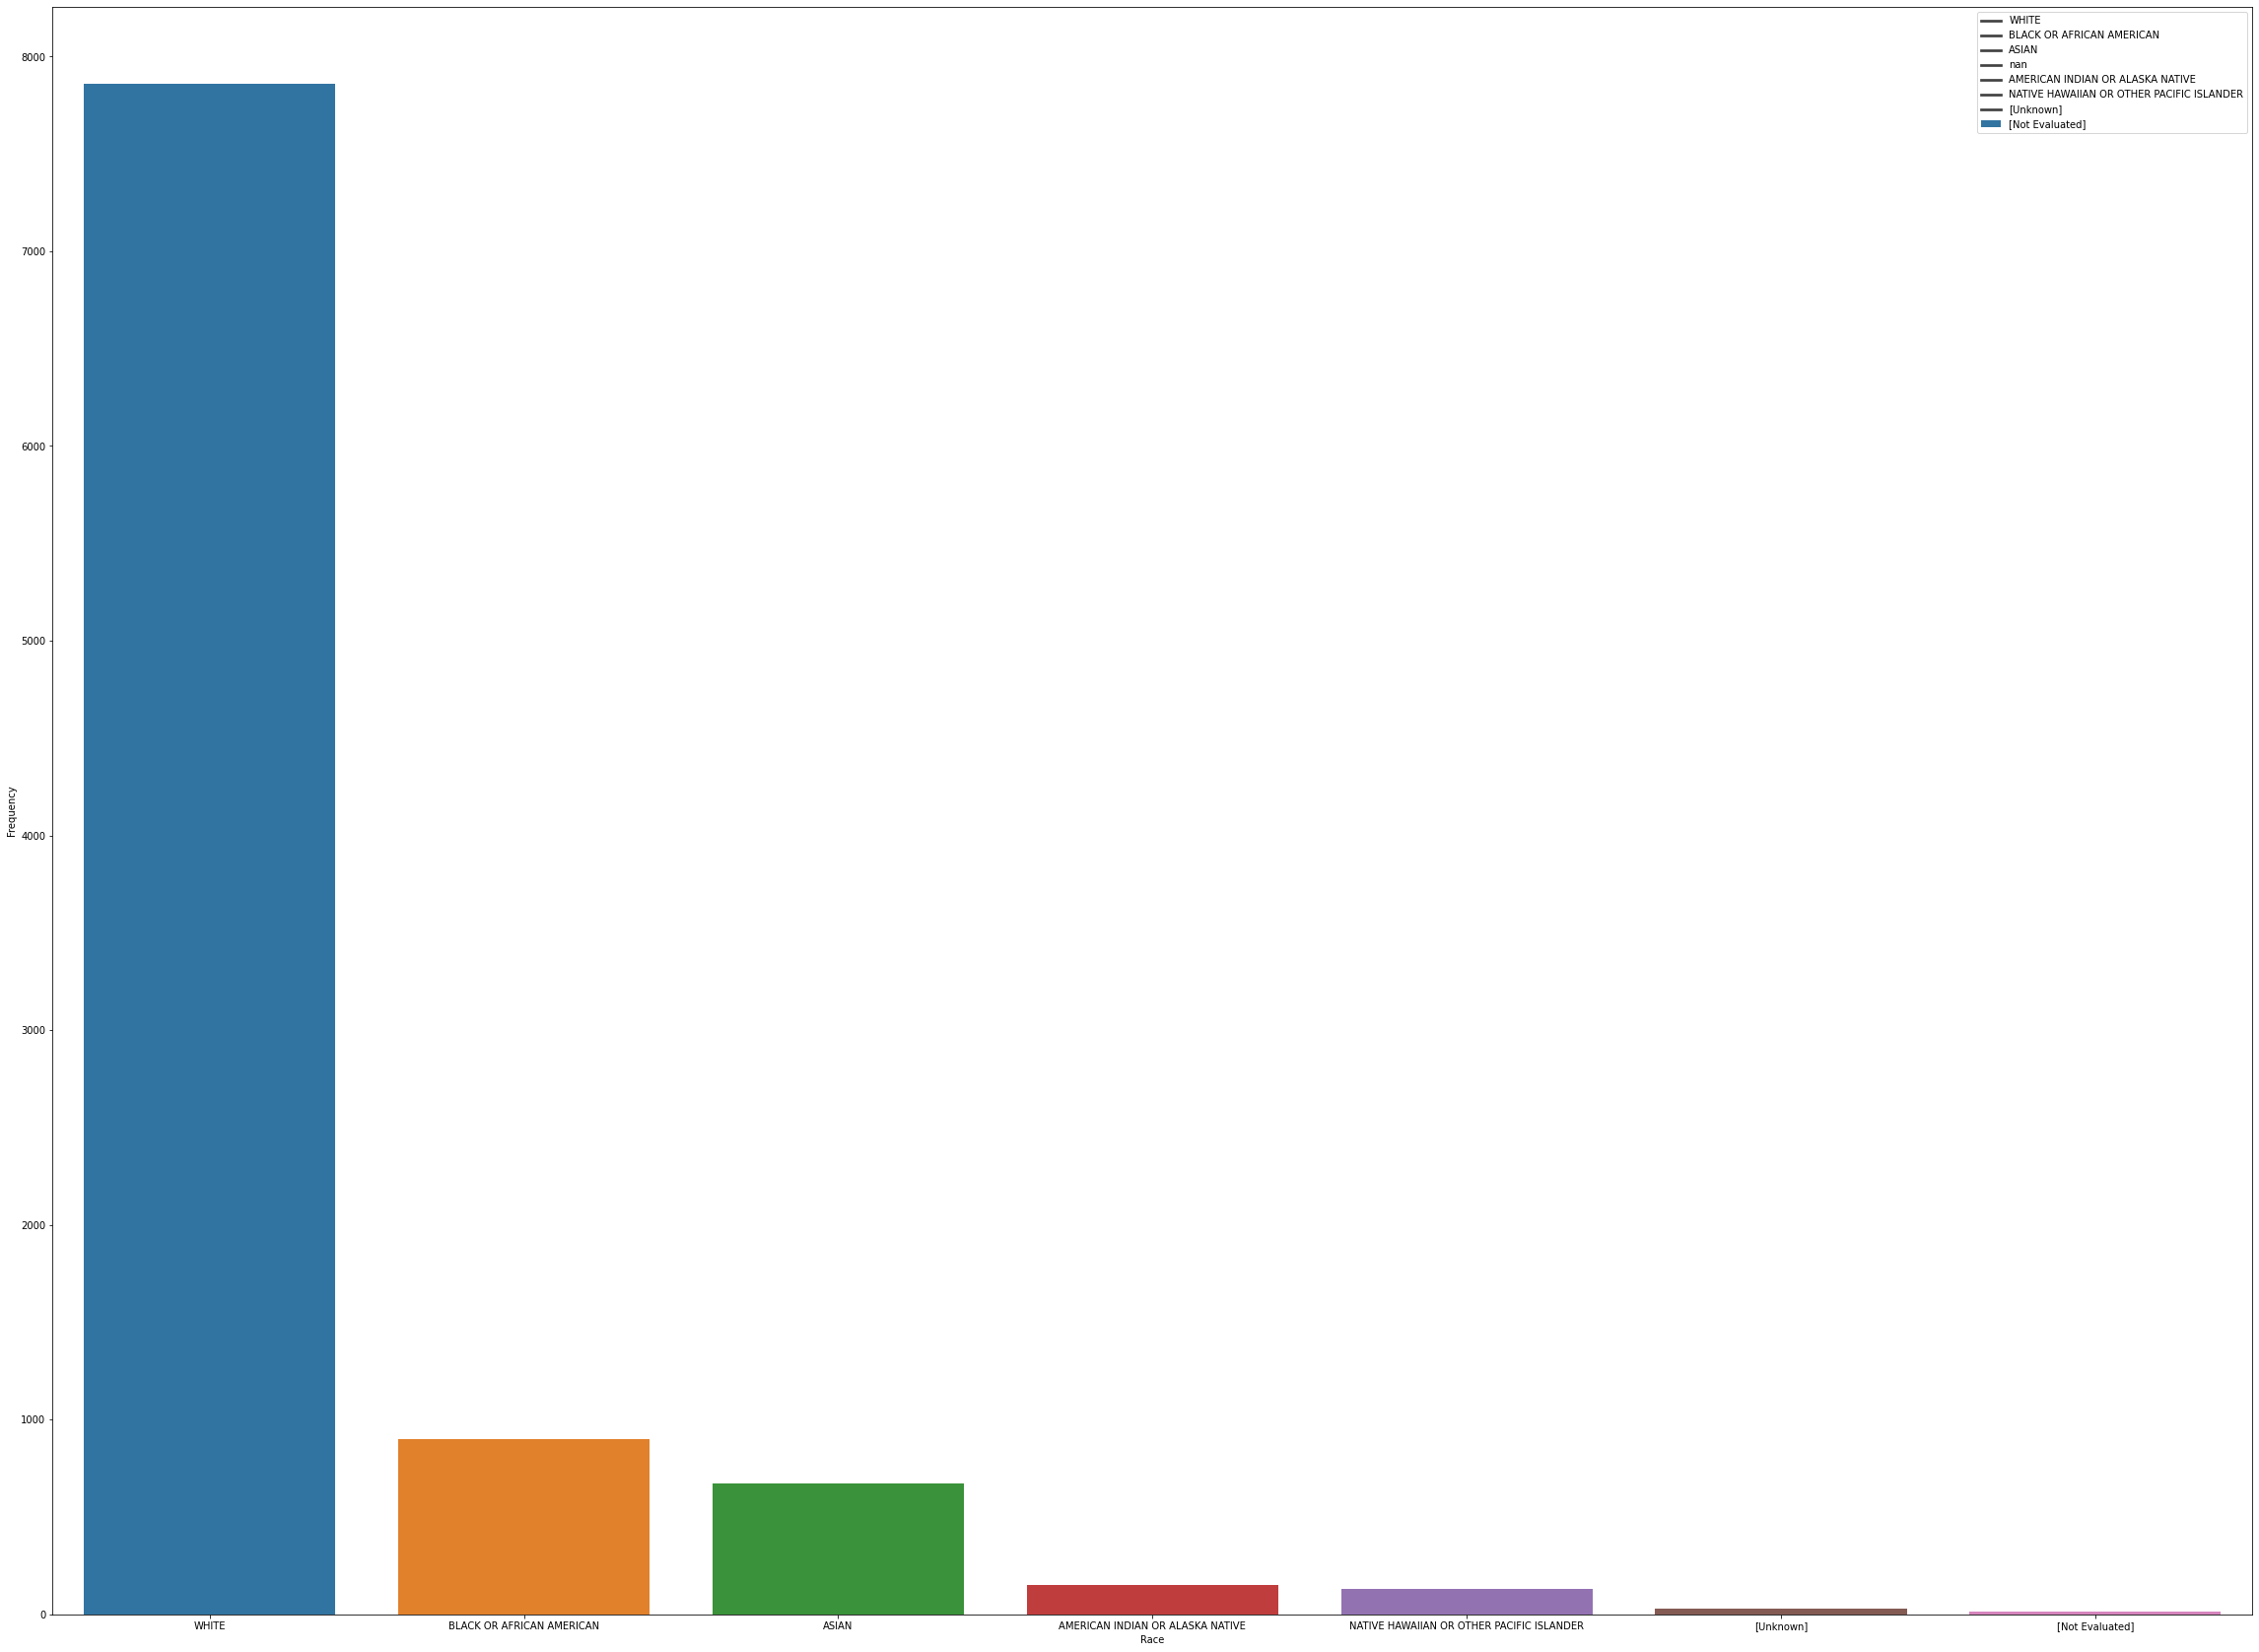

In [25]:
plt.figure(figsize=(40,30))
ax = sns.barplot(x=data['race'].dropna().unique(), y=list(data['race'].value_counts()))
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.legend(data['race'].unique())

In [26]:
data['ethnicity'].value_counts()

NOT HISPANIC OR LATINO    7850
[Not Evaluated]            573
HISPANIC OR LATINO         366
[Unknown]                  186
Name: ethnicity, dtype: int64

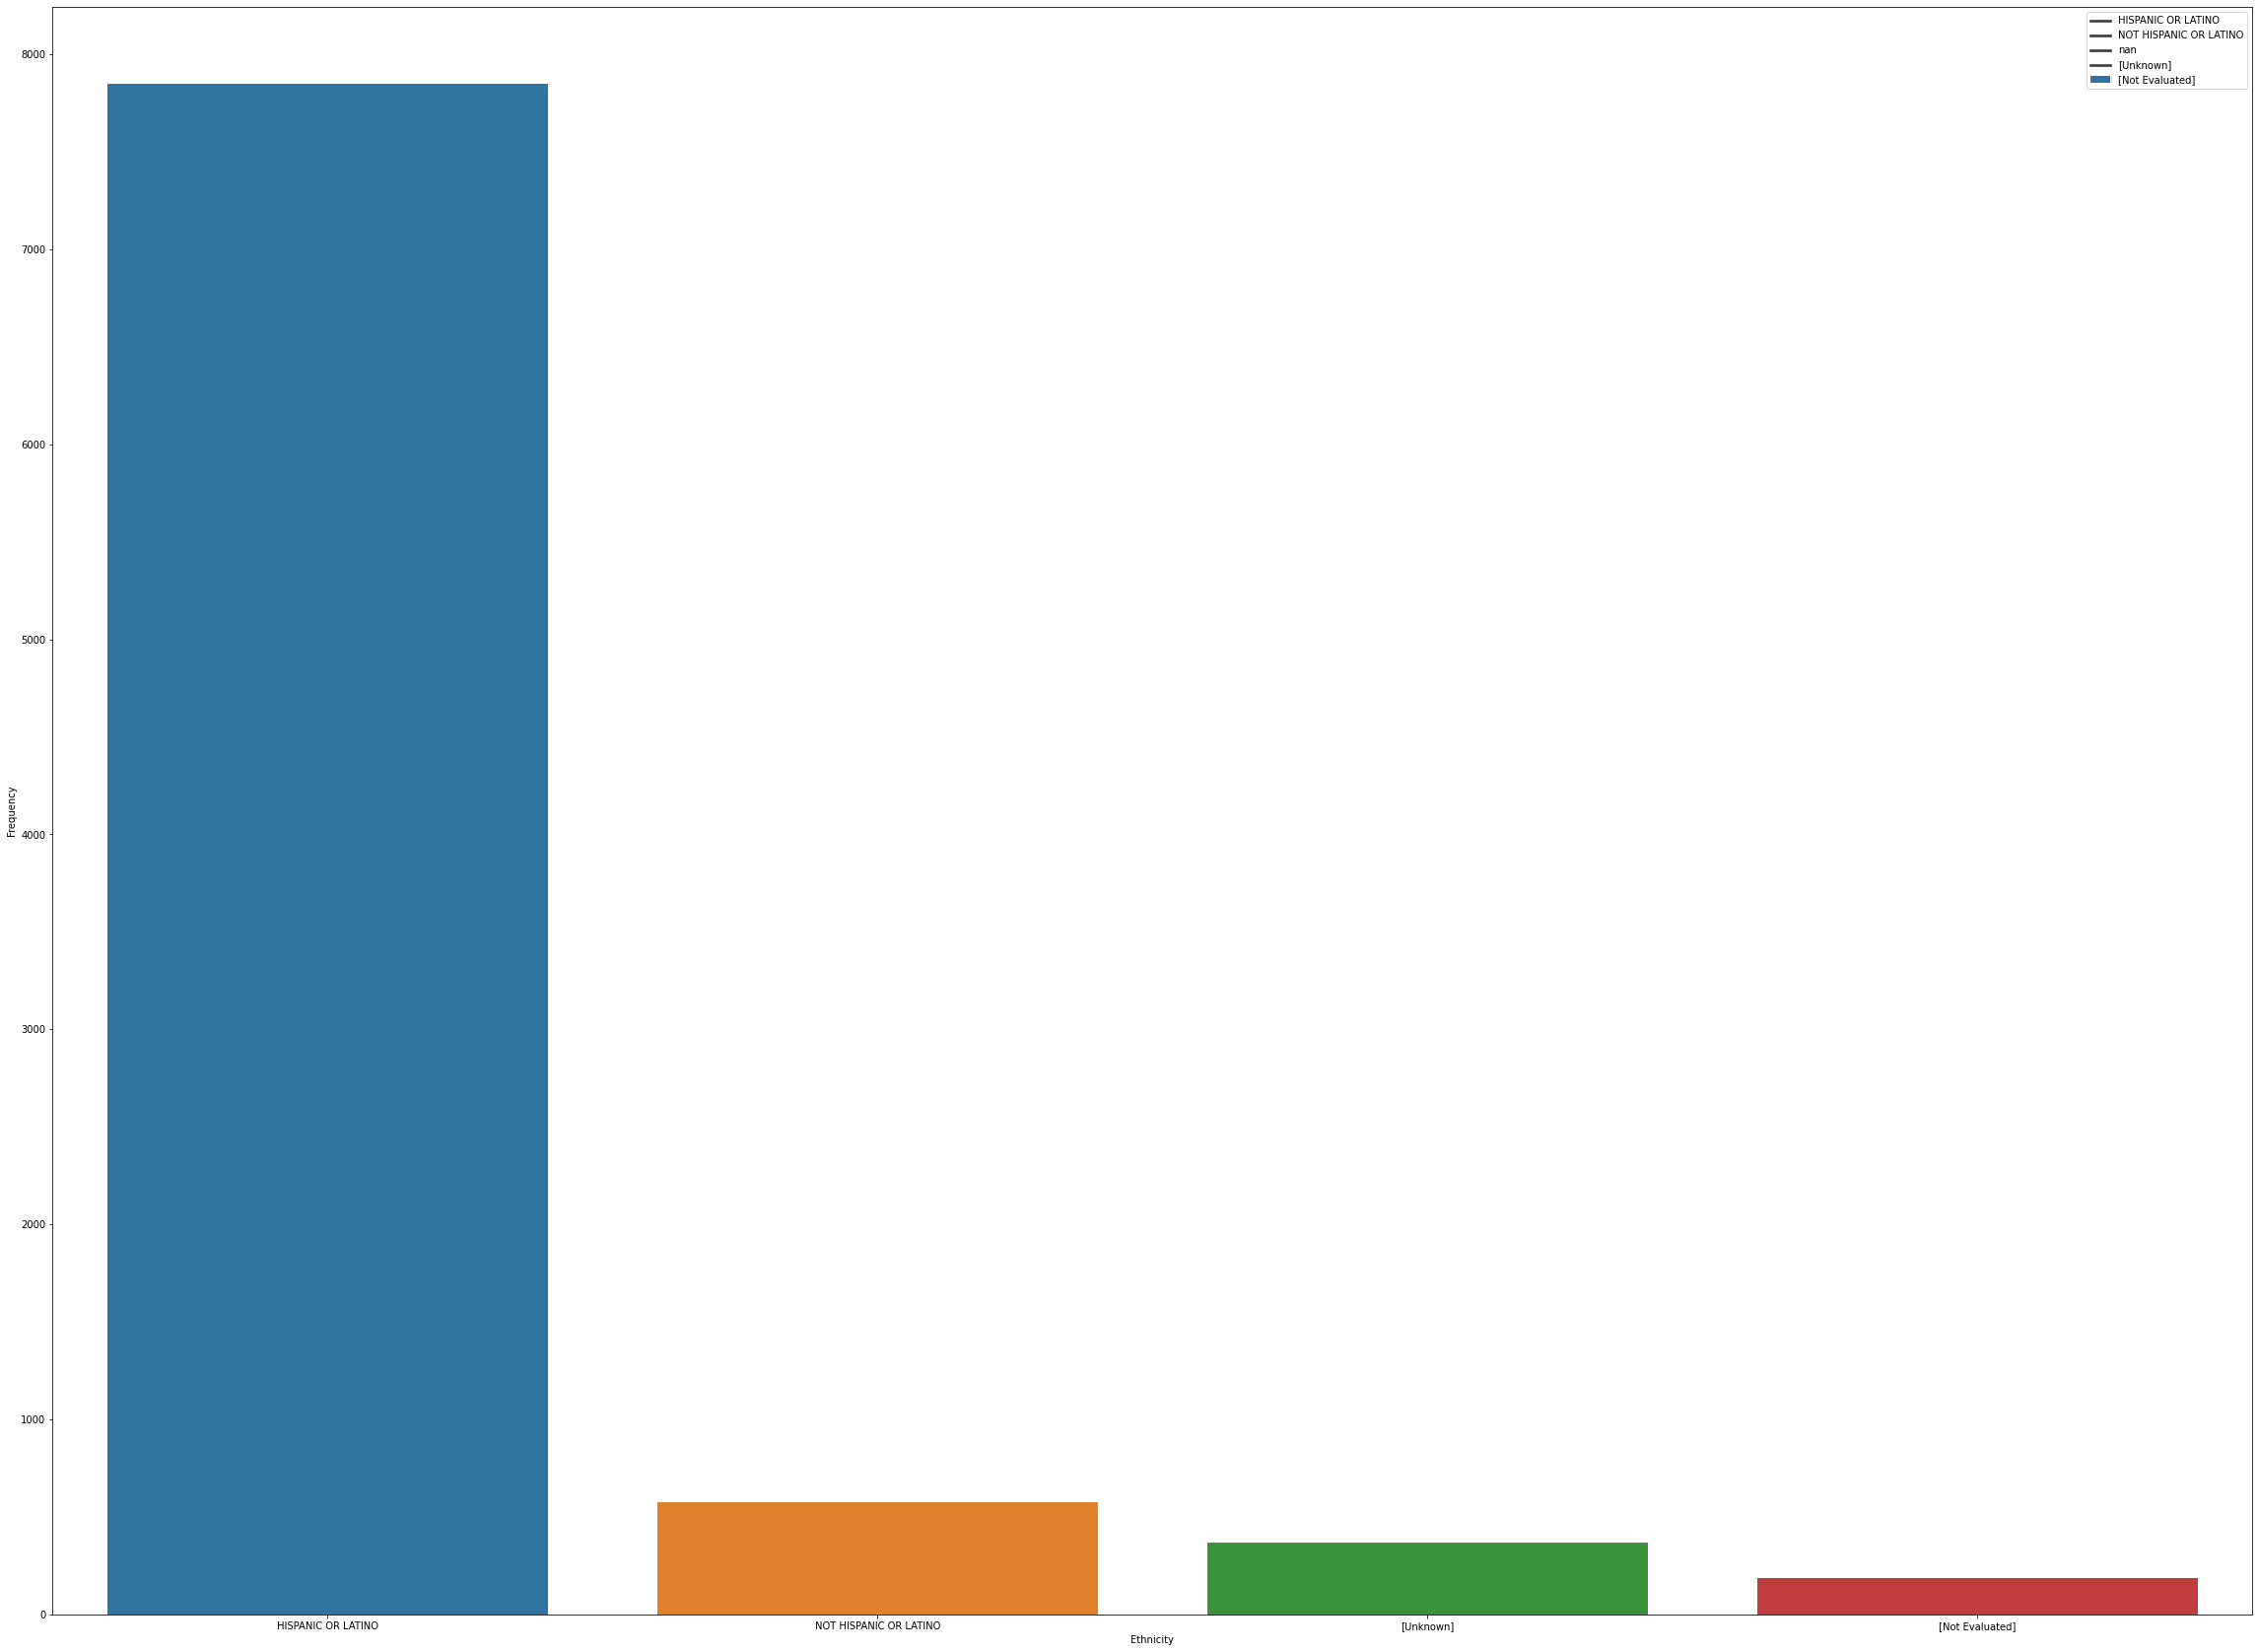

In [27]:
plt.figure(figsize=(40,30))
ax = sns.barplot(x=data['ethnicity'].dropna().unique(), y=list(data['ethnicity'].value_counts()))
plt.xlabel('Ethnicity')
plt.ylabel('Frequency')
plt.legend(data['ethnicity'].unique())

# 4. Provide a report of missingness across all columns
## Answer: isna() function is used to find the missingness of the data in tha dataset. 

In [28]:
data.isna().sum().to_list

<bound method IndexOpsMixin.tolist of bcr_patient_uuid                       0
bcr_patient_barcode                    0
acronym                                0
gender                                 0
vital_status                           4
                                   ...  
fetoprotein_outcome_lower_limit    10736
inter_norm_ratio_lower_limit       10734
family_cancer_type_txt             10740
bilirubin_upper_limit              10729
days_to_last_known_alive           10750
Length: 746, dtype: int64>

# 5.What’s the average age of a patient in this dataset?

### Answer: The first operation, "Age" column was created using the days_to birth column, from which the age has been calculated. Datatime library has been used to extract the year, month and the present day. After calculating the age the mean function was applied on the Age columnm to find the average age of the patient in the dataset.

In [29]:
import datetime
data['Age'] = -(data['days_to_birth'] / 365)
a_date = datetime.date.today()
print("The average age of the patient", data['Age'].mean())

The average age of the patient 59.649222663227945


# 6.Provide a breakdown of the patient’s birth year

##Assumptions:
##I referenced the year 2022 as the present year.The age has been subtracted from the present year to calculate the patient's birth year.

In [30]:
data['year'] = a_date.year - data['Age']
print("The patient’s birth year", data['year'].apply(np.ceil))

The patient’s birth year 0        1961.0
1        1967.0
2        1958.0
3        1968.0
4        1932.0
          ...  
10756    1965.0
10757    1941.0
10758    1977.0
10759    1941.0
10760    1966.0
Name: year, Length: 10761, dtype: float64


#### 7. Provide a list of the top 20 sorted values of the column - Eastern Cancer Oncology Group
####. Make assumptions as needed. 
####Hint: You may have to normalize the dataset to do this.

In [31]:
data['eastern_cancer_oncology_group'].value_counts()

0                  778
1                  642
[Not Evaluated]    366
[Unknown]          221
2                  133
0.0                 60
1.0                 50
3                   39
4                    9
2.0                  7
4.0                  1
Name: eastern_cancer_oncology_group, dtype: int64

# 8. Approach -1 
## Answer: First I identified the Metastatic Cancer Patient by filtered out the pathologic_m = M1 in the dataset and then group all the values based on the icd_10','icd_o_3_histology','icd_o_3_site 
# OR
## First I identified the Metastatic Cancer Patient by filtered out the clinical_M = M1 in the dataset and then group all the values based on the icd_10','icd_o_3_histology','icd_o_3_site.

In [32]:
data[data['pathologic_M']=='M1'].groupby(['icd_10','icd_o_3_histology','icd_o_3_site']).count()['pathologic_M']

icd_10  icd_o_3_histology  icd_o_3_site
C15.4   8070/3             C15.4           2
C15.5   8070/3             C15.5           1
        8140/3             C15.5           1
C16.0   8140/3             C16.0           3
        8144/3             C16.0           1
                                          ..
C69.80  8770/3             C69.8           1
C73     8260/3             C73.9           4
        8330/3             C73.9           1
        8340/3             C73.9           4
C77.3   8720/3             C77.3           1
Name: pathologic_M, Length: 79, dtype: int64

In [33]:
data[data['clinical_M']=='M1'].groupby(['icd_10','icd_o_3_histology','icd_o_3_site']).count()['clinical_M']

icd_10  icd_o_3_histology  icd_o_3_site
C02.9   8070/3             C02.9            1
C04.9   8070/3             C04.9            1
C09.9   8070/3             C09.9            1
C15.3   8070/3             C15.3            1
C15.4   8070/3             C15.4            2
        8140/3             C15.4            1
C15.5   8140/3             C15.5            3
C32.9   8070/3             C32.9            3
C62.90  9085/3             C62.9            1
C64.1   8260/3             C64.9           10
C64.9   8310/3             C64.9            3
C69.30  8770/3             C69.3            1
C74.0   8370/3             C74.0           17
Name: clinical_M, dtype: int64

# 9. Provide a survival analysis of all Breast Cancer patients. Breast Cancer patients can be identified using ICD 10 codes. You can Google for ICD codes and find the ones that match Breast Cancer.

## Packages Installed:
## Lifelines package was installed from lifelines KaplanMeierFitter function was used for the survival analysis of all the Breast cancer Patients.
## Parameters in the fit function of KaplanMeierFitter :

##X = durations (an array, list, pd.DataFrame or pd.Series) – length n – duration subject was observed for
##Y = event_observed (an array, list, pd.DataFrame, or pd.Series, optional) – True if the the death was observed, False if the event was lost (right-censored). Defaults all True if event_observed==None

## From the below graph we can see that the survival rate decreases with the increase in the number of months.


In [34]:
data['Y_Kaplan Meier'] = data['vital_status'].apply(lambda x: 0 if x=='Alive' else 1)
data['X_Kaplan Meier'] = data['days_to_death'].apply(lambda x:0 if x=='[Not Applicable]' or x=='[Discrepancy]' else float(x))
data['X_Kaplan Meier'].fillna(value = 0,inplace = True)
data['X_Kaplan Meier'] = (data['X_Kaplan Meier'] / 365 ) * 12
X = data['X_Kaplan Meier']
Y = data['Y_Kaplan Meier']

In [35]:
!pip install lifelines
from lifelines import KaplanMeierFitter 


     |████████████████████████████████| 348 kB 5.3 MB/s 
     |████████████████████████████████| 55 kB 2.3 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=1e8bda31ffd6e2e187ca183779ca4439814353ce2e9bab3b4876260dd8324459
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [36]:
model = KaplanMeierFitter()
model.fit(X, event_observed = Y)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 10761 total observations, 7326 right-censored observations>

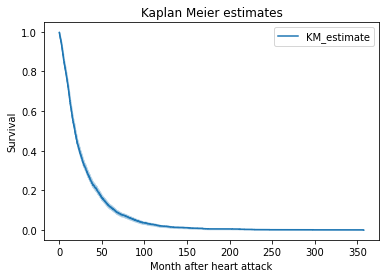

In [37]:
import matplotlib.pyplot as plt
model.plot()
plt.title("Kaplan Meier estimates")
plt.xlabel("Month after heart attack")
plt.ylabel("Survival")
plt.show()